In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.utils import image_dataset_from_directory

tf.config.list_physical_devices('GPU')

2024-03-12 14:00:22.337711: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-12 14:00:22.337763: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-12 14:00:22.338943: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-12 14:00:22.347200: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-12 14:00:23.222136: W tensorflow/compiler/tf2

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
train_dir = '../Generator/dataset1/train'
test_dir = '../Generator/dataset1/test'

In [3]:
IMG_SIZE = 500
BATCH_SIZE = 32
RANDOM_SEED = random.randint(0, 1000)
print(RANDOM_SEED)

395


In [4]:
train_dataset = image_dataset_from_directory(
    train_dir,
    #labels='inferred',
    #validation_split=0.2,
    #subset="training",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    seed=RANDOM_SEED
    )

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    seed=RANDOM_SEED
    )


Found 3000 files belonging to 4 classes.


2024-03-12 14:00:29.680694: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-12 14:00:29.681035: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-12 14:00:29.681269: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Found 1000 files belonging to 4 classes.


In [ ]:
for image_batch, labels_batch in train_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

In [5]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [7]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    layers.RandomBrightness(0.1),
    layers.RandomContrast(0.1),
    layers.RandomCrop(IMG_SIZE, IMG_SIZE)
])

inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(4, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

In [8]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [11]:
history = model.fit(train_dataset, epochs=10, batch_size=32)

Epoch 1/10


94/94 [==============================] - 40s 431ms/step - loss: 1.1503 - acc: 0.5007
Epoch 2/10


2024-03-12 14:18:51.854704: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 96000128 bytes after encountering the first element of size 96000128 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


94/94 [==============================] - 35s 377ms/step - loss: 1.0582 - acc: 0.5503
Epoch 3/10
94/94 [==============================] - 35s 377ms/step - loss: 0.9938 - acc: 0.5960
Epoch 4/10


2024-03-12 14:20:02.792357: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 96000128 bytes after encountering the first element of size 96000128 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


94/94 [==============================] - 35s 377ms/step - loss: 0.8984 - acc: 0.6410
Epoch 5/10
94/94 [==============================] - 35s 377ms/step - loss: 0.8174 - acc: 0.6763
Epoch 6/10
94/94 [==============================] - 35s 377ms/step - loss: 0.7693 - acc: 0.7083
Epoch 7/10
94/94 [==============================] - 36s 378ms/step - loss: 0.6597 - acc: 0.7507
Epoch 8/10
94/94 [==============================] - 36s 378ms/step - loss: 0.6132 - acc: 0.7837
Epoch 9/10
94/94 [==============================] - 36s 379ms/step - loss: 0.5333 - acc: 0.8260
Epoch 10/10
94/94 [==============================] - 35s 377ms/step - loss: 0.4493 - acc: 0.8480


In [ ]:
model.save('models/shape_classifier.h5')

2024-03-12 14:25:36.760970: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 96000128 bytes after encountering the first element of size 96000128 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-03-12 14:25:36.761016: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 96000128 bytes after encountering the first element of size 96000128 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


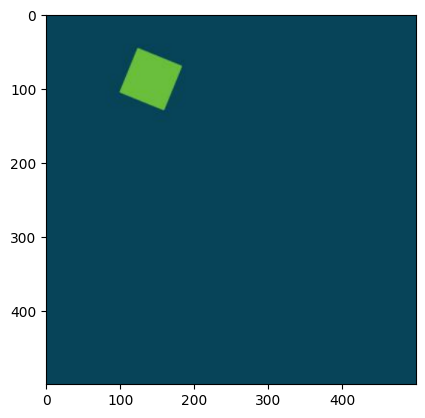

1/1 [==============================] - 1s 1s/step
[[1. 0. 1. 1.]]


In [12]:
img = np.array([])
for data_batch, label in test_dataset.take(1):
        image = data_batch[random.randint(0,10)].numpy().astype("uint8")
        img = np.append(img, image)
        plt.imshow(image)
        plt.show()
        break
img = img.reshape(IMG_SIZE, IMG_SIZE, 3)
img.astype("float32") / 255
img = np.expand_dims(img, axis=0)

print(model.predict(img).round())

In [13]:
val_loss, val_acc = model.evaluate(test_dataset, batch_size=64)
print(val_loss, val_acc)

32/32 [==============================] - 7s 236ms/step - loss: 1.1631 - acc: 0.5800
1.163124442100525 0.5799999833106995


In [ ]:
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')

ax = plt.gca()
ax.set_ylim([0, 1])
plt.title('Training accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
img = tf.keras.preprocessing.image.load_img('cats_and_dogs_small/validation/dogs/dog.1010.jpg', target_size=(150, 150), interpolation='bilinear')

In [ ]:
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
print(img_array.shape)
result = model.predict(img_array)
print("Result: ", result.round())